In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Dynamically add project root to sys.path
PROJECT_ROOT = os.path.abspath("..")  # Adjust if necessary
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# Verify sys.path
print("Project root added to sys.path:", PROJECT_ROOT)

from utils.config import *

from src.adjustcls import *
from src.adjustl1 import *
from src.decomposer import *
from utils.loadsimulation import *
from utils.moments import *
from utils.image import *

plt.rcParams.update({
    'axes.titlesize': 22,            # Font size for the plot titles
    'axes.labelsize': 20,            # Font size for the x and y labels
    'legend.fontsize': 16,           # Font size for the legend
    'xtick.labelsize': 20,           # Font size for the x-tick labels
    'ytick.labelsize': 20,           # Font size for the y-tick labels
    'axes.linewidth': 3.5,           # Width of the axes' lines
    'xtick.major.width': 3.25,       # Width of the major x-tick lines
    'ytick.major.width': 3.25,       # Width of the major y-tick lines
    'xtick.minor.width': 4.0,        # Width of the minor x-tick lines
    'ytick.minor.width': 4.0,        # Width of the minor y-tick lines
    'figure.titlesize': 20,          # Font size for figure titles
    'legend.handlelength': 2,        # Length of the legend lines
    'legend.handleheight': 0.7,      # Height of the legend markers
    'legend.labelspacing': 0.5,      # Vertical spacing between legend entries
    'lines.linewidth': 3.0,          # Line width for plot lines
    'lines.markersize': 3,           # Size of markers in plot lines
    'axes.grid': False,               # Enable grid on all plots
    'grid.alpha': 0.75,              # Set gridline transparency
    'grid.linestyle': '--',          # Set gridline style
    'grid.linewidth': 0.7,           # Set gridline width
    'grid.color': 'gray',            # Set gridline color
})

Project root added to sys.path: /feynman/work/dap/lcs/vt272285/Generative modelling of convergence map
Global imports loaded successfully!


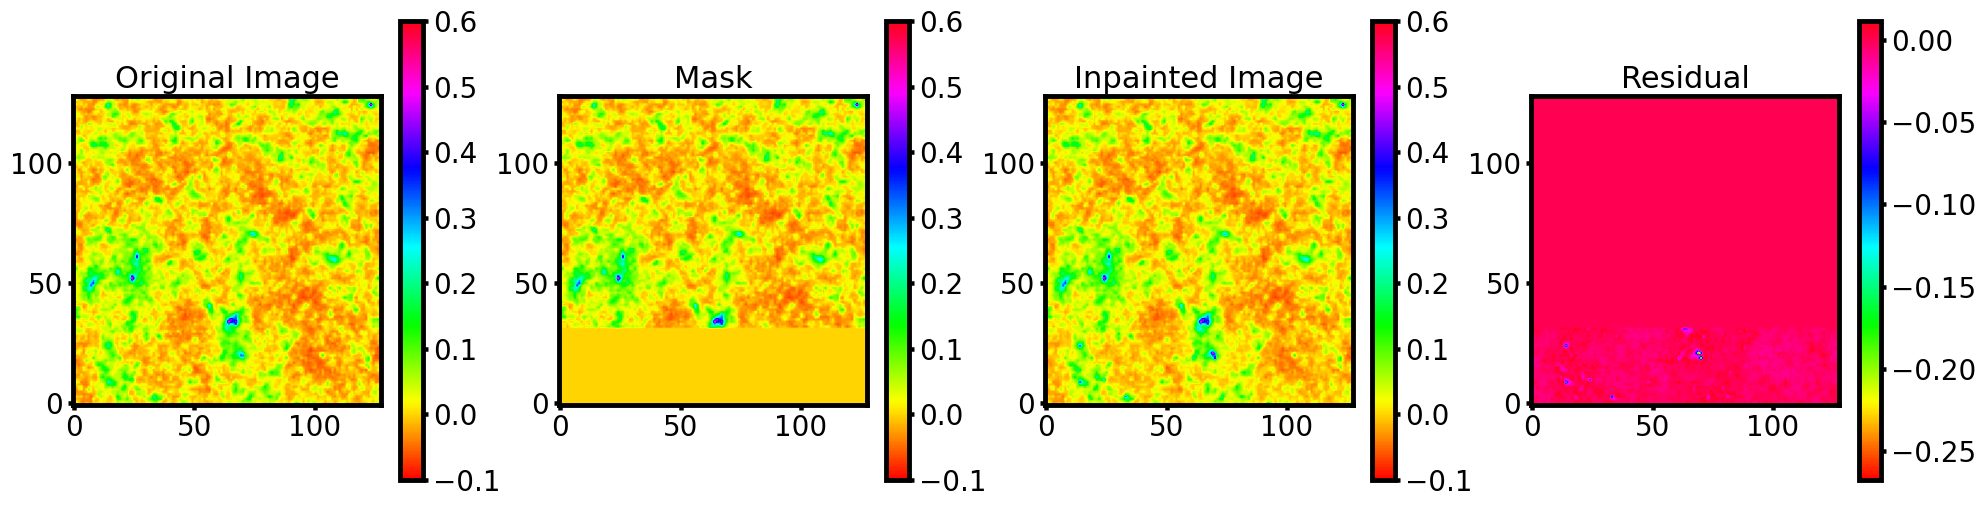

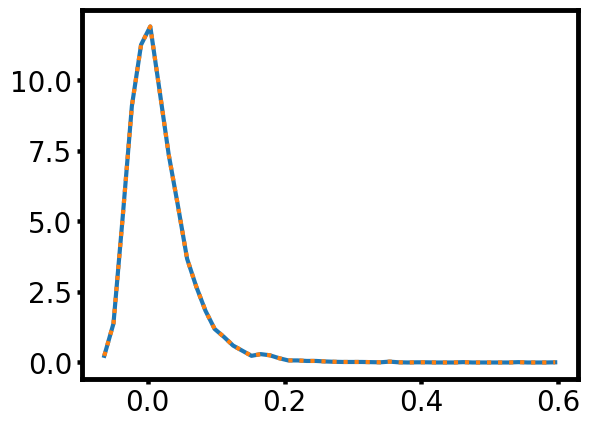

In [31]:
path = '/feynman/work/dap/lcs/vt272285/data/SLICS/2.007kappa_weight.dat_LOS400'
angle = 10
loader = SimulationDataLoader(user_defined_angle=angle) 

loaded_data, loaded_angle = loader.load_data(path)
data_downscaled = downscale_local_mean(loaded_data-np.mean(loaded_data), (4, 4))

N = 128

target = data_downscaled[:N,:N]
density = True
mask = np.ones_like(target)
mask[:N//4, :N] = 0

binedges, bincenters, hist, l1_norm = calculate_histogram_l1norm(target, mask, nbins=50, density=density)

# Store the computed statistics
targetvalues = {
    'histogram': hist,
    'binedges': binedges,
    'l1_norm': l1_norm,
    'bincenters': bincenters
}

# Make a copy before passing it to avoid modifying `target`

inpainted_image = np.copy(target)
for i in range(1):
    inpainted_image, _ = adjust_map_l1(inpainted_image, 1 - mask, targetvalues=targetvalues, density=density)
    residual = target - inpainted_image

plt.figure(figsize=(20, 5))
vmin = -0.1
vmax = 0.6
cmap = 'hsv'
plt.subplot(141)
plt.imshow(target, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
plt.title("Original Image")
plt.colorbar()
plt.subplot(142)
plt.imshow(mask*np.copy(target), cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
plt.title("Mask")
plt.colorbar()
plt.subplot(143)
plt.imshow(inpainted_image, cmap=cmap, origin='lower', vmin=vmin, vmax = vmax)
plt.title("Inpainted Image")
plt.colorbar()
plt.subplot(144)
plt.imshow(residual, cmap=cmap, origin='lower')
plt.title("Residual")
plt.colorbar()
plt.tight_layout()
plt.show()

binedges, bincenters, hist, l1_norm = calculate_histogram_l1norm(inpainted_image, mask, nbins=50, density=density)

# Store the computed statistics
inpaintedvalues = {
    'histogram': hist,
    'binedges': binedges,
    'l1_norm': l1_norm,
    'bincenters': bincenters
}

plt.plot(targetvalues['bincenters'], targetvalues['histogram'], label='Original')
plt.plot(inpaintedvalues['bincenters'], inpaintedvalues['histogram'], label='Inpainted', ls=":")

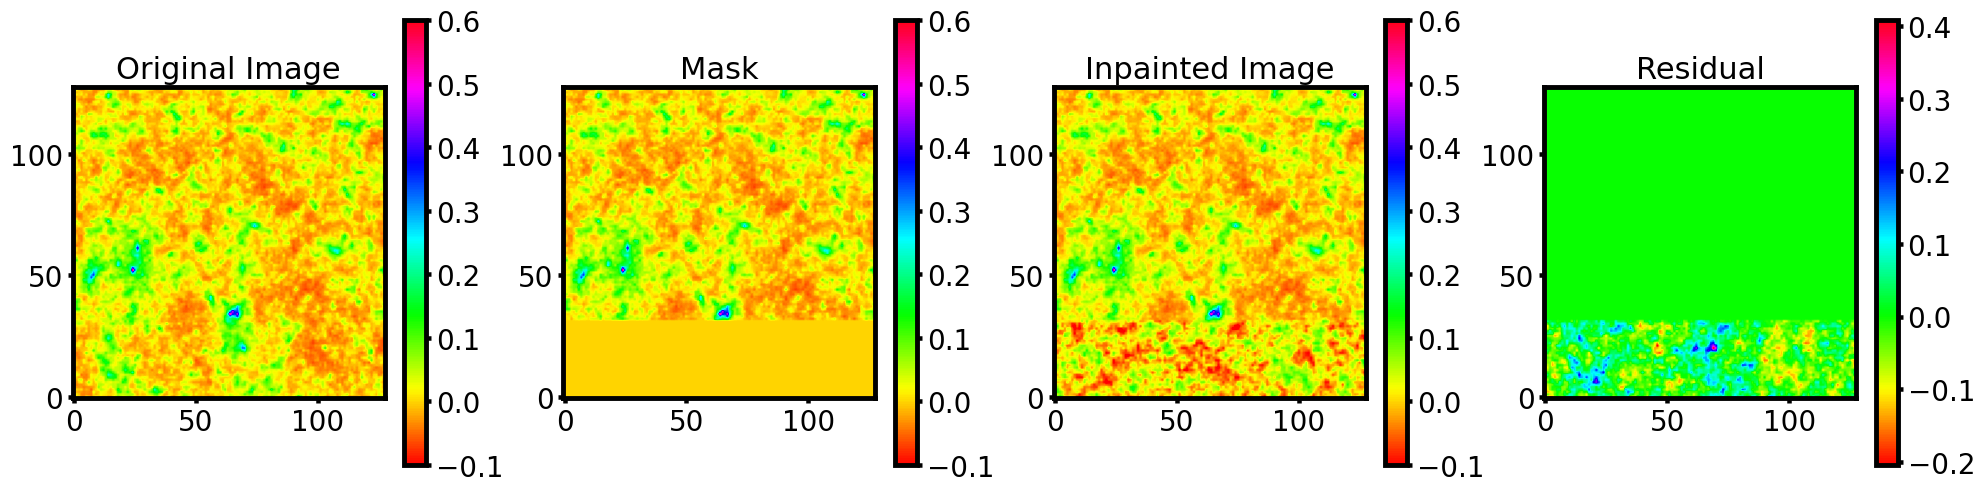

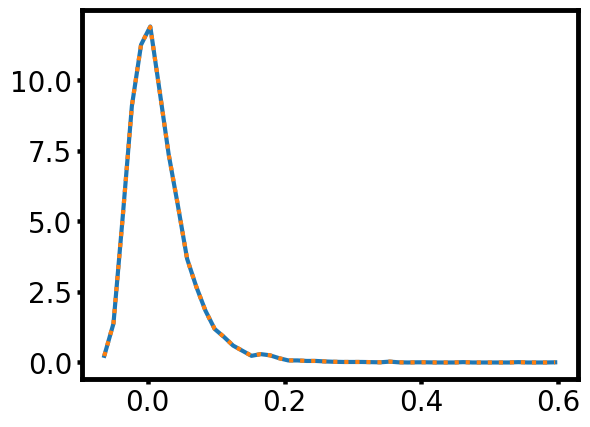

In [32]:
from lenspack.image.inpainting import inpaint

dct_inpainted_image = inpaint(target, mask, niter=500, thresholding='hard')
residual = target - dct_inpainted_image

plt.figure(figsize=(20, 5))
cmap = 'hsv'
vmin = -0.1
vmax = 0.6
plt.subplot(141)
plt.imshow(target, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
plt.title("Original Image")
plt.colorbar()
plt.subplot(142)
plt.imshow(mask*np.copy(target), cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
plt.title("Mask")
plt.colorbar()
plt.subplot(143)
plt.imshow(dct_inpainted_image, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
plt.title("Inpainted Image")
plt.colorbar()
plt.subplot(144)
plt.imshow(residual, cmap=cmap, origin='lower')
plt.title("Residual")
plt.colorbar()
plt.tight_layout()
plt.show()

binedges, bincenters, hist, l1_norm = calculate_histogram_l1norm(dct_inpainted_image, mask, nbins=50, density=density)

# Store the computed statistics
inpaintedvalues = {
    'histogram': hist,
    'binedges': binedges,
    'l1_norm': l1_norm,
    'bincenters': bincenters
}

plt.plot(targetvalues['bincenters'], targetvalues['histogram'], label='Original')
plt.plot(inpaintedvalues['bincenters'], inpaintedvalues['histogram'], label='Inpainted', ls=":")